In [3]:
import numpy as np
import matplotlib.pyplot as plt
figure_size = (6,4)

In [4]:
import os
import numpy as np
import pandas as pd

class Velocity_Profile:
    def __init__(self, directory):
        self.directory = directory
        self.coefficients = np.loadtxt('polynomial_coefficients.txt')
        self.mean_voltages = []
        self.y_vals = []
        self.u = []
        self.y = []
        self.figsize = (6,4)
        self.read_files()

    def read_files(self):
        for filename in os.listdir(self.directory):
            if os.path.isfile(os.path.join(self.directory, filename)):
                # Process the file here
                data = pd.read_csv(os.path.join(self.directory, filename))   
                mean_voltage = np.mean(data.iloc[:, 1])
                self.mean_voltages.append(mean_voltage)

                y_val = ''
                for i, letter in enumerate(filename):
                    if filename[i] == 'y' and filename[i+1] == '=':
                        while filename[i+2].isdigit() or filename[i+2]==',':
                            if filename[i+2]==',':
                                y_val += '.'
                            else:
                                y_val += filename[i+2]
                            i += 1
                        self.y_vals.append(float(y_val))


        self.u = np.polyval(self.coefficients, self.mean_voltages)

        sorted_indices = np.argsort(self.y_vals)
        self.y_vals = np.array(self.y_vals)[sorted_indices]
        self.u = np.array(self.u)[sorted_indices]

    def plot(self):
        # Plot the points and the fitted curve
        plt.figure(figsize=self.figsize)
        plt.scatter(self.y_vals, self.u, label='Data', color='blue')
        plt.legend()
        plt.ylim(0, max(self.u)*1.2)
        plt.title('Velocity profile')
        plt.xlabel('y')
        plt.ylabel('Velocity [m/s]')
        plt.grid()
        plt.show() 


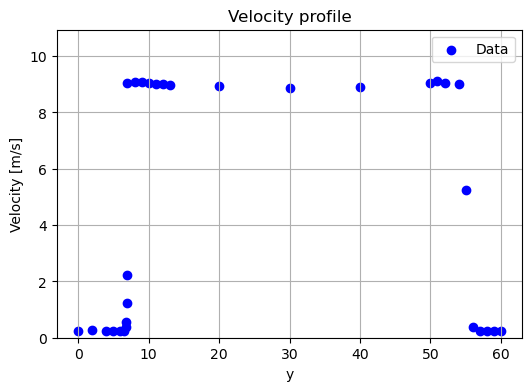

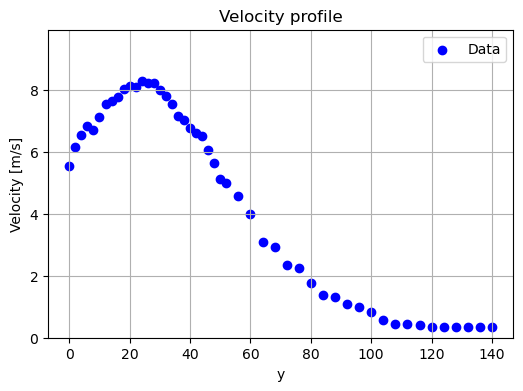

In [5]:
top_hat = Velocity_Profile("Measurement\Data\Profile1")
top_hat.plot()

bell_profile = Velocity_Profile("Measurement\Data\Profile2")
bell_profile.plot()
